In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
!pip install --upgrade category_encoders
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
%matplotlib inline
import math
from scipy.spatial.distance import cdist

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso,LassoCV
from sklearn.metrics import mean_absolute_error as mae

In [11]:
RANDOM_STATE = 42

In [12]:
train_data = pd.read_csv('/content/train_features.csv')
test_data = pd.read_csv('/content/test_features.csv')

## На прошлом этапе было выяснено, что выборка содержит nan, пока что заполним их медианным значением столбцов

In [13]:
train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())

In [14]:
y_all = train_data['score']
X_all = train_data.drop(columns= ['score'])

## Рассмотрим полученные данные

In [15]:
train_data.head()

,Unnamed: 0,id,lat,lon,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_356,feature_357,feature_358,feature_359,feature_360,feature_361,feature_362,feature_363,feature_364,score
0,0,0,56.228300,43.945535,80.150307,62.371799,0.231151,0.190791,0.401593,0.262687,...,0.228140,0.428027,0.421322,0.120457,0.066100,0.277080,0.284752,0.393504,0.419411,0.080523
1,1,1,56.834244,53.141543,422.140622,394.735262,0.703569,0.714943,1.244729,0.668947,...,0.482856,1.024162,1.060983,0.352759,0.173544,0.559313,0.587983,0.908193,1.022209,0.104424
2,2,2,45.042299,41.990170,649.454889,604.670442,2.041519,1.648886,4.610085,2.382528,...,0.228140,0.428027,0.421322,0.120457,0.066100,0.277080,0.284752,0.393504,0.419411,0.067615
3,3,3,59.849408,30.387762,266.547403,135.772055,1.959585,1.601667,1.886425,2.249831,...,0.210626,0.393573,0.374401,0.069029,0.033405,0.216291,0.220776,0.292940,0.303940,0.088038
4,4,4,59.839643,30.304308,341.286115,173.445004,2.458311,2.133810,2.382954,2.777616,...,0.258991,0.493006,0.500567,0.093142,0.040327,0.268085,0.267661,0.360577,0.398923,0.099686


In [16]:
train_data.shape

(3084, 370)

In [17]:
test_data.head()

,Unnamed: 0,id,lat,lon,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_355,feature_356,feature_357,feature_358,feature_359,feature_360,feature_361,feature_362,feature_363,feature_364
0,0,3084,55.782276,49.148234,228.504804,201.237050,0.534703,0.596046,1.033242,0.524757,...,0.173227,0.207618,0.401864,0.383266,0.076681,0.048279,0.213695,0.242550,0.335866,0.353891
1,1,3085,56.841500,35.853059,46.100074,29.498006,0.244402,0.237712,0.290964,0.262922,...,0.216028,0.229874,0.435700,0.429377,0.133193,0.072630,0.281771,0.296773,0.408779,0.437925
2,2,3086,55.356780,86.156697,485.420697,754.825649,0.859098,1.025815,2.023108,0.728783,...,1.923477,1.894780,3.963464,3.846240,2.159473,0.978725,3.205196,3.306732,4.865104,5.172344
3,3,3087,56.755087,60.703962,820.001904,876.678735,3.024856,3.159111,4.840167,2.924235,...,0.411261,0.538010,0.359002,0.356985,0.222790,0.105348,0.507103,0.619185,0.353620,0.385528
4,4,3088,59.907438,30.250297,225.679545,114.771976,1.697391,1.465041,1.611878,1.912050,...,0.196816,0.175811,0.317209,0.317286,0.056242,0.030668,0.211721,0.186310,0.239998,0.260960


In [18]:
def coorelation_matrix(df):
  f = plt.figure(figsize=(19, 15))
  plt.matshow(df.corr(), fignum=f.number)
  plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
  plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=14)
  plt.title('Correlation Matrix', fontsize=16)

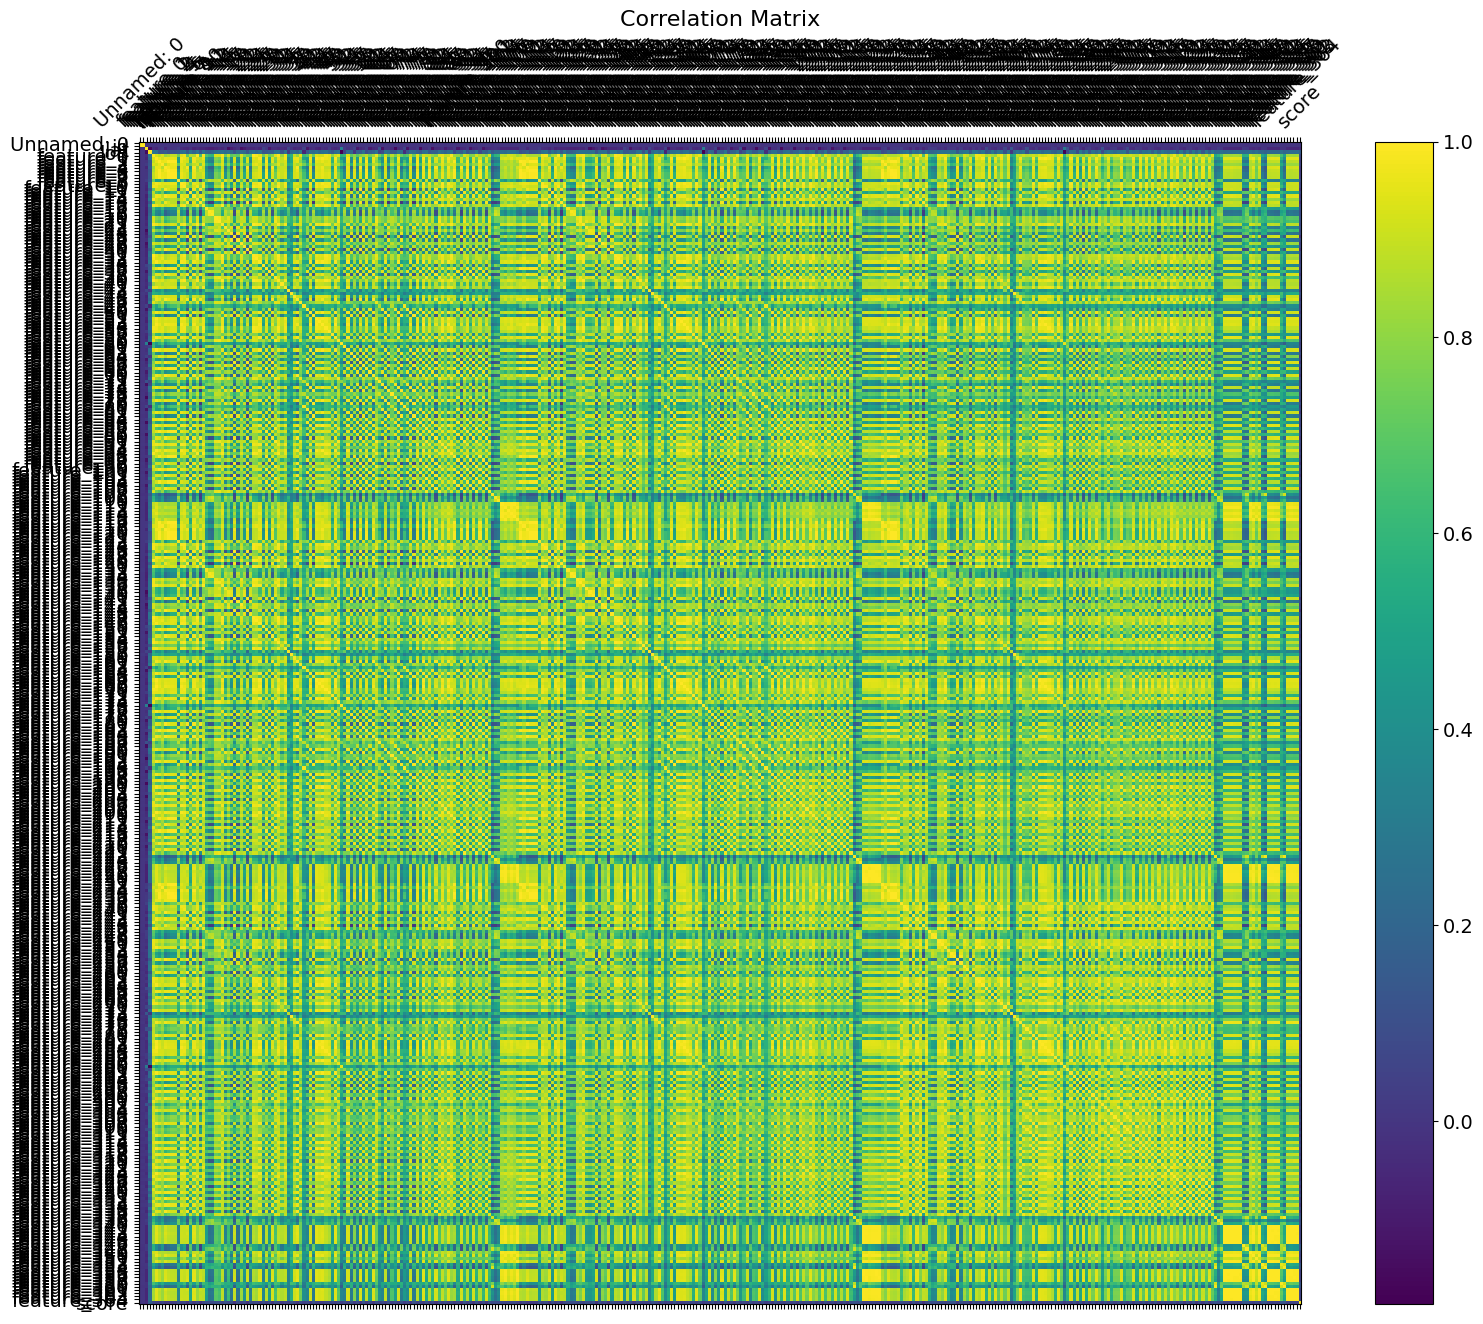

In [19]:
coorelation_matrix(train_data)

Заметим, что присутствует много коорелирующих фичей

In [20]:
y_train = train_data['score']
X_train = train_data.drop(columns=['score'])

In [21]:
X_test = test_data

In [22]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2, random_state=RANDOM_STATE)

## Отберем признаки с помощью Лассо регрессии

In [23]:
lasso_cv = LassoCV(cv=20, random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=20, random_state=42)

Рассмотрим полученные веса признаков, заметим что большинство из них занулились и не имеют ценности

In [24]:
print(lasso_cv.coef_)

[ 1.08664138e-06  1.35696726e-21 -9.05940683e-05  1.91206154e-03
 -5.42550600e-05  2.64043245e-06  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.01276355e-03 -0.00000

In [25]:
sfm = SelectFromModel(lasso_cv,prefit=True)

In [26]:
sfm.fit(X_train,y_train)

SelectFromModel(estimator=LassoCV(cv=20, random_state=42), prefit=True)

In [27]:
X_train_selected = pd.DataFrame(sfm.transform(X_train))
X_test_selected = pd.DataFrame(sfm.transform(X_test))
X_valid_selected = pd.DataFrame(sfm.transform(X_valid))
X_all_selected = pd.DataFrame(sfm.transform(X_all))

### Рассмотрим коореляцию таргета с оставшимися фичами, также стоит отметить что из отобранных фичей, фича 2 коорелирует с 4 и 6, 3 коорелирует с 5, можно удалить данные фичи

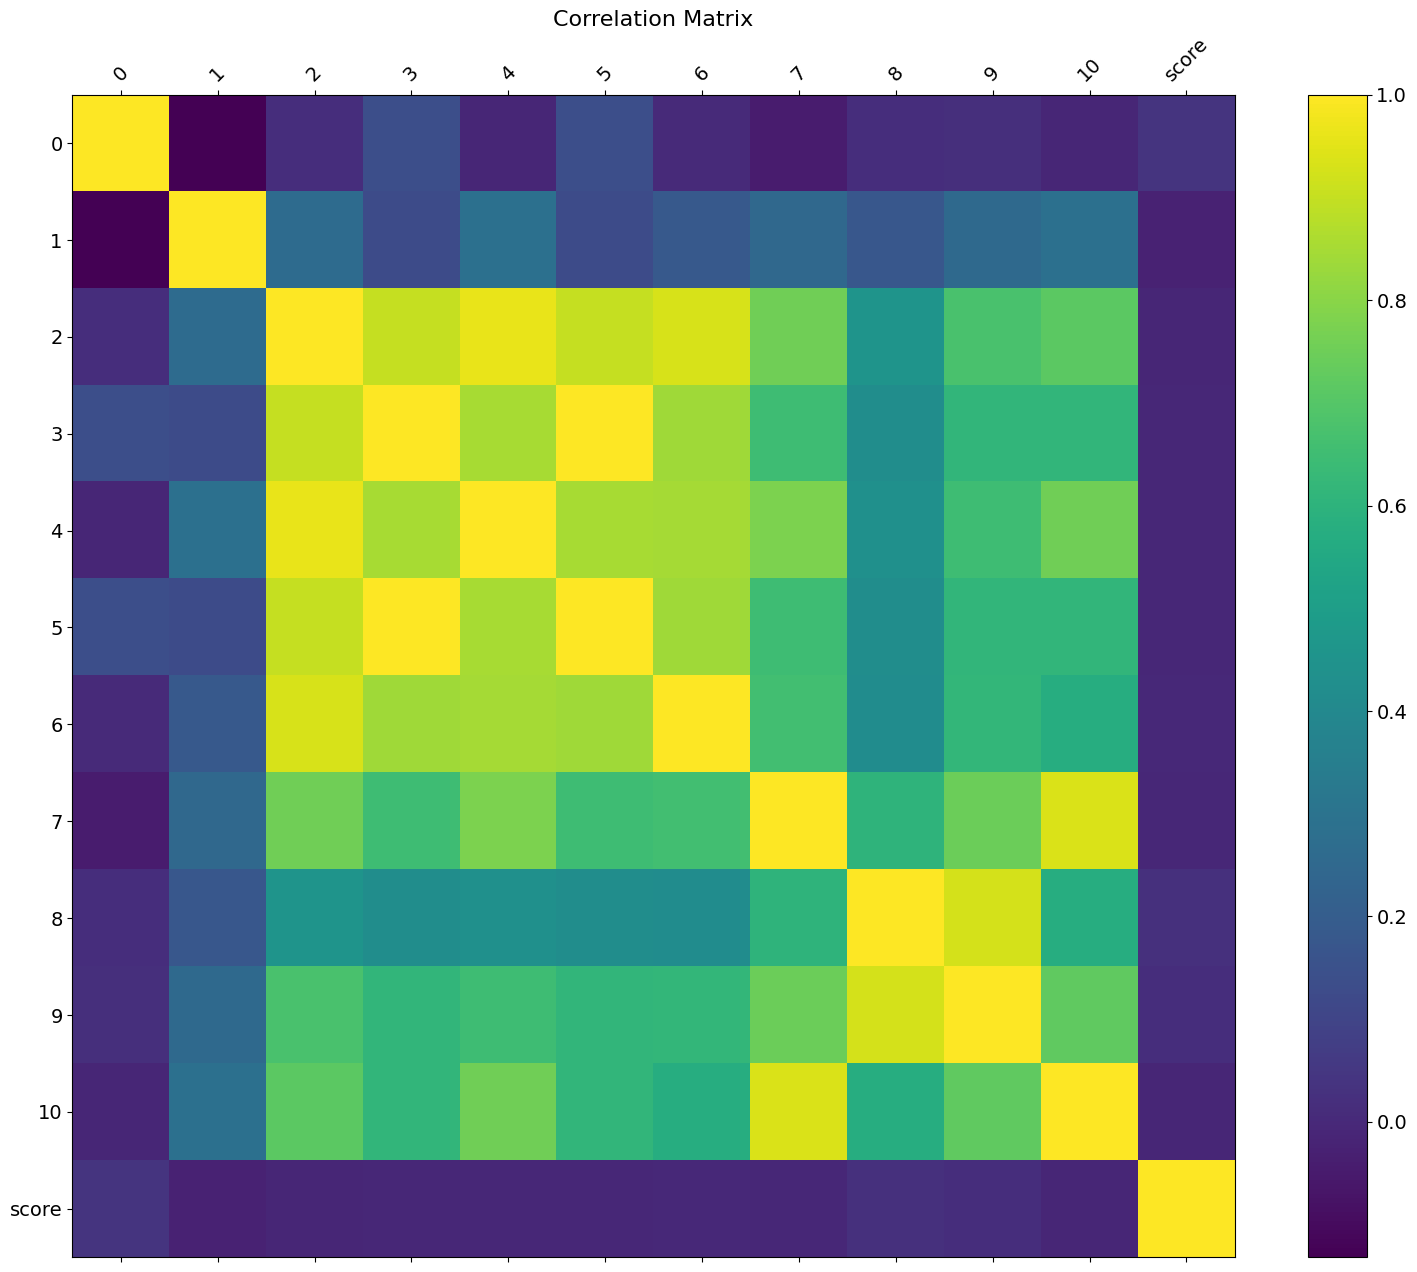

In [28]:
X_train_selected['score'] = y_train
coorelation_matrix(pd.DataFrame(X_train_selected))
X_train_selected = X_train_selected.drop(columns = ['score'])

## Удалим значения рассматривая коореляцию

In [29]:
X_train_selected_rem = X_train_selected.drop(columns = [4,3])
X_valid_selected_rem = X_valid_selected.drop(columns = [4,3])

In [30]:
X_test_selected_rem = X_test_selected.drop(columns = [4,3])
X_all_selected_rem = X_all_selected.drop(columns = [4,3])

### Работа с бустингом

Учитывая малое число данных для решения регресси возможно использование случайного леса, svm и бустинга, для получения оптимального значения требуемой метрики

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

Данные гиперапараметры были получено с помощбю перебора по сетке

In [32]:
gs_model = GradientBoostingRegressor(loss='absolute_error', learning_rate =  0.1, max_depth= 5, n_estimators =  200)

Заметим, что это код только обучения, так что обучаемся на всех имеющихся данных

In [33]:
gs_model.fit(X_all_selected_rem,y_all)

GradientBoostingRegressor(loss='absolute_error', max_depth=5, n_estimators=200)

Сохраняем отобранные фичи

In [ ]:
X_train_selected_rem.to_csv('predict_features_train.csv')
X_test_selected_rem.to_csv('predict_features_test.csv')

In [38]:
y_res = gs_model.predict(X_test_selected_rem)
X_test['score'] = y_res

In [39]:
X_test.head()

,Unnamed: 0,id,lat,lon,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_356,feature_357,feature_358,feature_359,feature_360,feature_361,feature_362,feature_363,feature_364,score
0,0,3084,55.782276,49.148234,228.504804,201.237050,0.534703,0.596046,1.033242,0.524757,...,0.207618,0.401864,0.383266,0.076681,0.048279,0.213695,0.242550,0.335866,0.353891,0.096096
1,1,3085,56.841500,35.853059,46.100074,29.498006,0.244402,0.237712,0.290964,0.262922,...,0.229874,0.435700,0.429377,0.133193,0.072630,0.281771,0.296773,0.408779,0.437925,0.101282
2,2,3086,55.356780,86.156697,485.420697,754.825649,0.859098,1.025815,2.023108,0.728783,...,1.894780,3.963464,3.846240,2.159473,0.978725,3.205196,3.306732,4.865104,5.172344,0.123114
3,3,3087,56.755087,60.703962,820.001904,876.678735,3.024856,3.159111,4.840167,2.924235,...,0.538010,0.359002,0.356985,0.222790,0.105348,0.507103,0.619185,0.353620,0.385528,0.160293
4,4,3088,59.907438,30.250297,225.679545,114.771976,1.697391,1.465041,1.611878,1.912050,...,0.175811,0.317209,0.317286,0.056242,0.030668,0.211721,0.186310,0.239998,0.260960,0.086939


In [40]:
X_test[['id','score']].to_csv('submission.csv',index=False)

In [ ]:
from joblib import dump, load

In [ ]:
dump(gs_model, 'model.joblib') 